In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Define rnd_normal to generate random normally distributed $N$ samples with mean $\mu$ and std $\sigma$.

### Estimator for $\hat{\mu} = \frac{1}{N} \sum_{i} x_i$

### Estimator for $\hat{\sigma}_0 = \sqrt{\frac{1}{N-1} \sum_{i} (x_i - \bar{\mu})^{2}}$

### Estimator for $\hat{\sigma}_1 = \sqrt{\frac{1}{N} \sum_{i} (x_i - \bar{\mu})^{2}}$

### Some other candidate estimators for $\sigma$:

### Estimator for $\hat{\sigma}_{00} = \sqrt{\frac{1}{N-1} \sum_{i} (x_i - \mu)^{2}}$

### Estimator for $\hat{\sigma}_{11} = \sqrt{\frac{1}{N} \sum_{i} (x_i - \mu)^{2}}$




In [2]:
def rnd_normal(mu, sigma, N):
    return np.random.normal(mu, sigma, N)


def mu_estimator(data):
    return (1/len(data))*np.sum(data)

def mu_estimator_1(data):
    return np.max(data)
    

def sigma_estimator_0(data):
    return np.sqrt((1/(len(data)-1))*np.sum( ( data - np.mean(data) )**2 ))

def sigma_estimator_1(data):
    return np.sqrt((1/(len(data)))*np.sum( ( data - np.mean(data) )**2 ))


def sigma_estimator_00(data, mu):
    return np.sqrt((1/(len(data)-1))*np.sum( ( data - mu )**2 ))

def sigma_estimator_11(data, mu):
    return np.sqrt((1/(len(data)))*np.sum( ( data - mu )**2 ))
    

In [3]:

## No. of experiments carried 
r = 1000

## Sample size 
N = 10

## True parameter values 
mu = 50 
sigma = 12


#### First observe the performance of a biased estimator $\hat{\mu} = \max_{D}{x_i}$

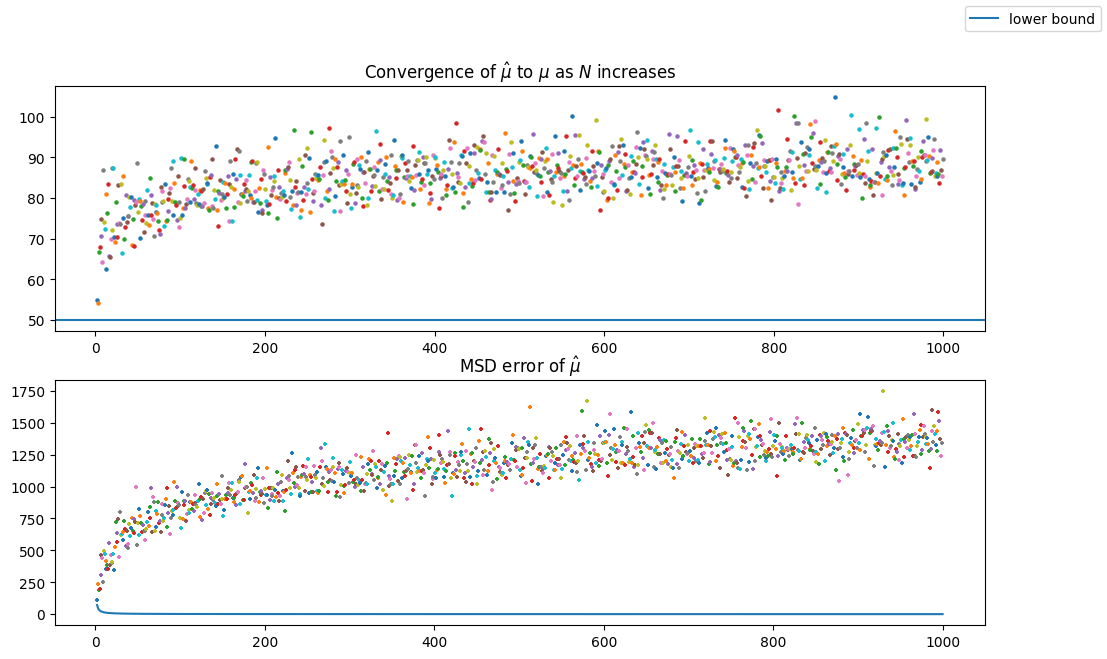

In [4]:

fig, ax = plt.subplots(figsize=(12,7), nrows = 2, ncols= 1)

ax[0].axhline(y=mu)

arr = np.linspace(2,1000,1000)

ax[1].plot(arr, [sigma**2/num for num in arr] , label="lower bound")


for sample_size in range(2,1000):
    data = rnd_normal(mu, sigma, sample_size)
    mu_hat = mu_estimator_1(data)
    ax[0].scatter(sample_size, mu_hat, s=5)    

    sq_err = 0
    for experiments in range(1,10):
        data2 = rnd_normal(mu, sigma, sample_size)
        sq_err += (mu_estimator_1(data2) - mu)**2
    
    ax[1].scatter(sample_size, sq_err/10, s=5, marker="+")
    

ax[0].set_title(r"Convergence of $\hat{\mu}$ to $\mu$ as $N$ increases")
ax[1].set_title(r"MSD error of $\hat{\mu}$")

fig.legend()



## Showing $\bar{\mu}$ is unbaised estimator of $\mu$
### The estimator is $\hat{\mu} = \frac{1}{N} \sum_{i} x_i$

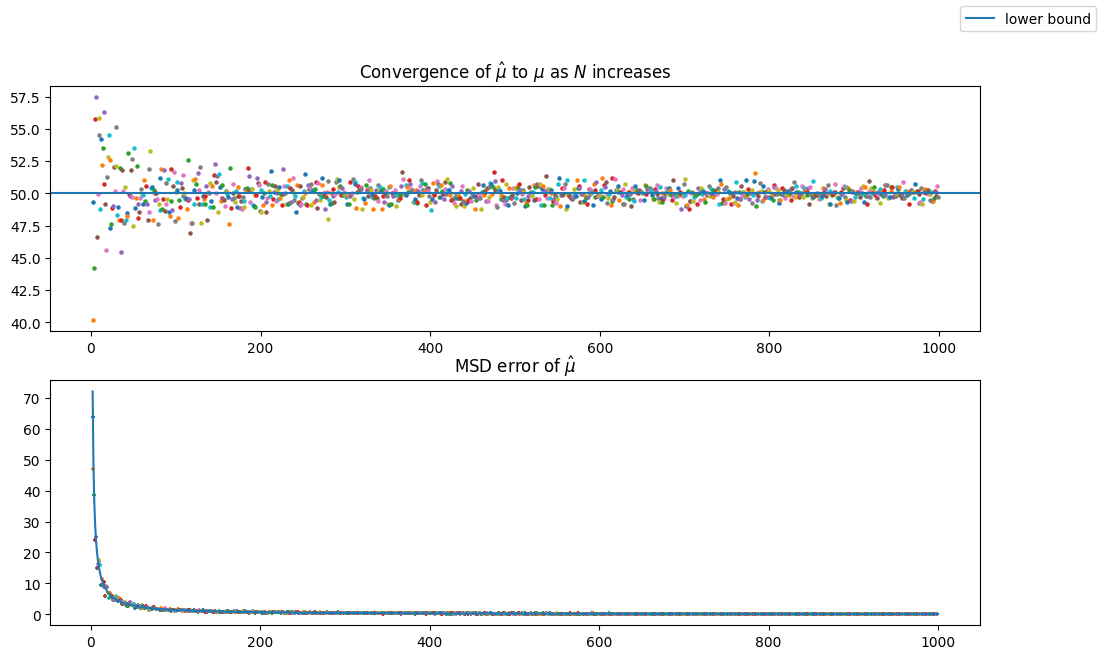

In [5]:

fig, ax = plt.subplots(figsize=(12,7), nrows = 2, ncols= 1)

ax[0].axhline(y=mu)

arr = np.linspace(2,1000,1000)

ax[1].plot(arr, [sigma**2/num for num in arr] , label="lower bound")


for sample_size in range(2,1000):
    data = rnd_normal(mu, sigma, sample_size)
    mu_hat = mu_estimator(data)
    ax[0].scatter(sample_size, mu_hat, s=5)    

    sq_err = 0
    for experiments in range(1,100):
        data2 = rnd_normal(mu, sigma, sample_size)
        sq_err += (mu_estimator(data2) - mu)**2
    
    ax[1].scatter(sample_size, sq_err/100, s=5, marker="+")
    

ax[0].set_title(r"Convergence of $\hat{\mu}$ to $\mu$ as $N$ increases")
ax[1].set_title(r"MSD error of $\hat{\mu}$")

fig.legend()



### Here its clearly seen $\hat{\mu}$ is unbaised as it tends to true value with increasing sample size
#### The mean squared error for this unbaised estimator closely follows the curve for optimal error possible as $\hat{\mu}$ is the optimal estimator for $\mu$. The underestimation for small sample size will reduce when better averaging is done...
#### However for any other estimator, unbiased or not, its MSD curve will be above the lower bound curve
### Eg. $\hat{\mu}= median_{D}({x_i})$
###     $\hat{\mu}= mode_{D}({x_i})$


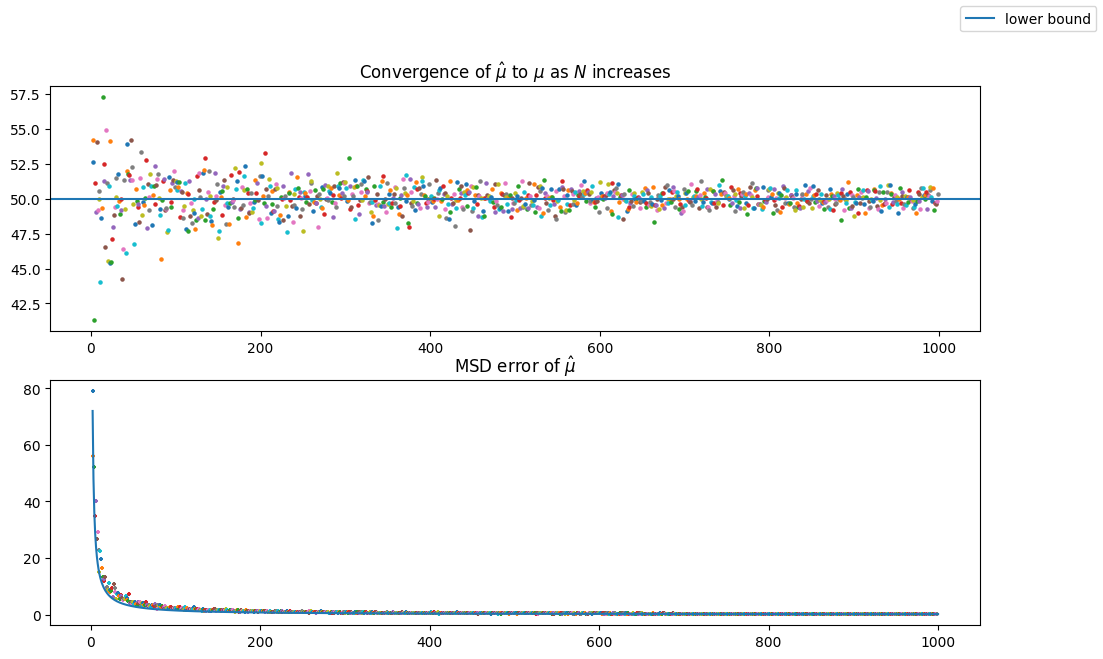

In [6]:

fig, ax = plt.subplots(figsize=(12,7), nrows = 2, ncols= 1)

ax[0].axhline(y=mu)

arr = np.linspace(2,1000,1000)

ax[1].plot(arr, [sigma**2/num for num in arr] , label="lower bound")


for sample_size in range(2,1000):
    data = rnd_normal(mu, sigma, sample_size)
    mu_hat = np.median(data)
    ax[0].scatter(sample_size, mu_hat, s=5)    

    sq_err = 0
    for experiments in range(1,100):
        data2 = rnd_normal(mu, sigma, sample_size)
        sq_err += (np.median(data2) - mu)**2
    
    ax[1].scatter(sample_size, sq_err/100, s=5, marker="+")
    

ax[0].set_title(r"Convergence of $\hat{\mu}$ to $\mu$ as $N$ increases")
ax[1].set_title(r"MSD error of $\hat{\mu}$")

fig.legend()



/tmp/ipykernel_48773/3704262392.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(data)
/tmp/ipykernel_48773/3704262392.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode2 = stats.mode(data2)


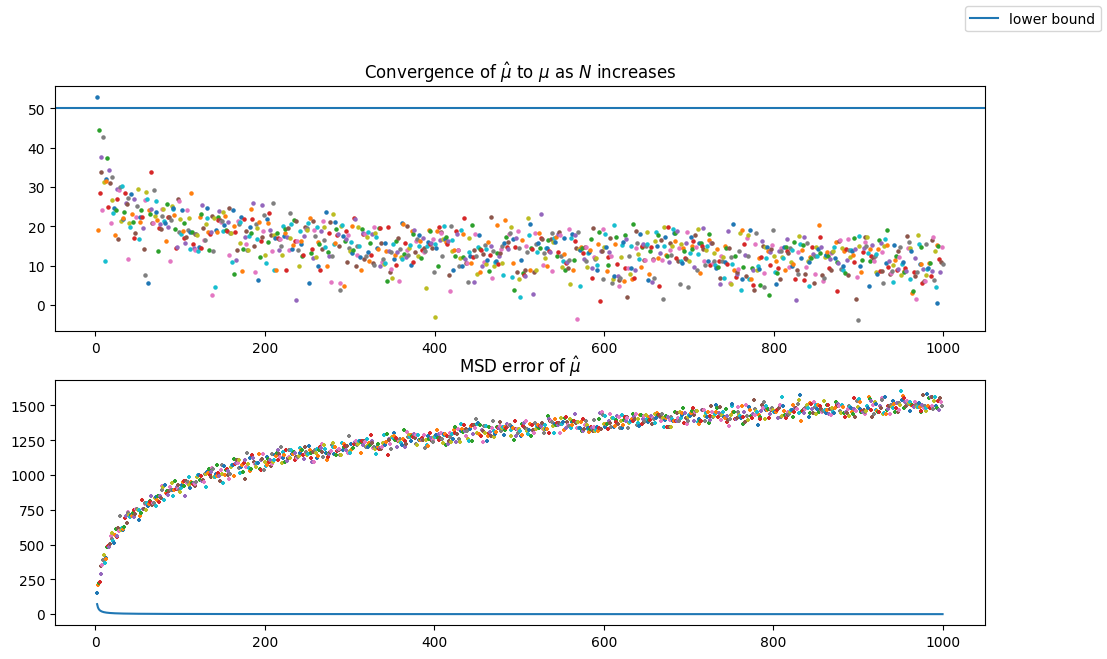

In [7]:

from scipy import stats

fig, ax = plt.subplots(figsize=(12,7), nrows = 2, ncols= 1)

ax[0].axhline(y=mu)

arr = np.linspace(2,1000,1000)

ax[1].plot(arr, [sigma**2/num for num in arr] , label="lower bound")


for sample_size in range(2,1000):
    data = rnd_normal(mu, sigma, sample_size)
    mode = stats.mode(data)
    mu_hat = mode[0][0]
    ax[0].scatter(sample_size, mu_hat, s=5)    

    sq_err = 0
    for experiments in range(1,100):
        data2 = rnd_normal(mu, sigma, sample_size)
        mode2 = stats.mode(data2)
        sq_err += (mode2[0][0] - mu)**2
    
    ax[1].scatter(sample_size, sq_err/100, s=5, marker="+")
    

ax[0].set_title(r"Convergence of $\hat{\mu}$ to $\mu$ as $N$ increases")
ax[1].set_title(r"MSD error of $\hat{\mu}$")

fig.legend()

## Estimating $\sigma$


Text(0.5, 1.0, ' MSD $\\hat{\\sigma_{1}}$ estimator')

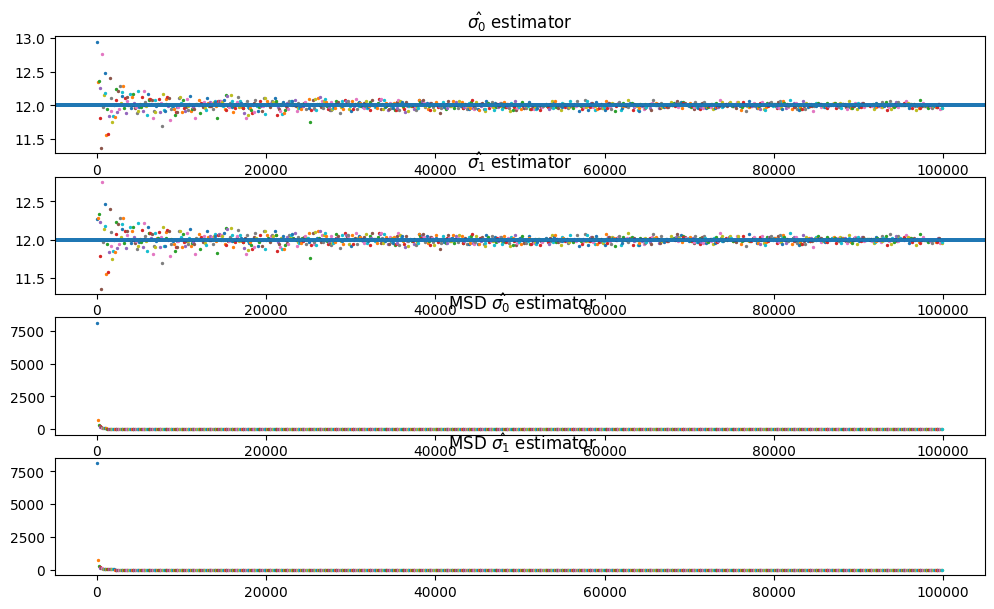

In [18]:

## No. of experiments carried 
r = 1000

## True parameter values 
mu = 50 
sigma = 12

fig, ax = plt.subplots(figsize=(12,7), nrows=4, ncols=1)

### Draw samples of size N and estimate sigma using estimators above. Repeat for r experiments and finally 

for N in range(10, 100000, 100):
    std_data = rnd_normal(mu, sigma, N)
    
    sigma_hat_0 = sigma_estimator_0(std_data)
    
    sigma_hat_1 = sigma_estimator_1(std_data)
    
    ax[0].scatter(N, sigma_hat_0, s=2)
    ax[0].axhline(y=sigma)
    
    ax[1].scatter(N, sigma_hat_1, s=2)
    ax[1].axhline(y=sigma)
    
    sq_err_0 = 0
    sq_err_1 = 0
    for j in range(r):
        std_data2 = rnd_normal(mu, sigma, N)

        sigma_hat_0 = sigma_estimator_0(std_data2)
    
        sigma_hat_1 = sigma_estimator_1(std_data2)

        sq_err_0 += ( sigma_hat_0 - sigma )**2
        
        sq_err_1 += ( sigma_hat_1 - sigma )**2
    
    ax[2].scatter(N, sq_err_0, s=2)
    ax[3].scatter(N, sq_err_1, s=2)

        
    
    
ax[0].set_title(r"$\hat{\sigma_{0}}$ estimator")
ax[1].set_title(r"$\hat{\sigma_{1}}$ estimator")
ax[2].set_title(r" MSD $\hat{\sigma_{0}}$ estimator")
ax[3].set_title(r" MSD $\hat{\sigma_{1}}$ estimator")




### Estimating $\theta \in [0, 2 \pi]$ in $N$ i.i.d realizations of random variable $x_i$.
### $p(x_i =0) = \sin^{2}(\theta/2)$ and $p(x_i =1) = \cos^{2}(\theta/2)$
### Using Maximum Likelihood Estimator $\hat{\theta} = 2 \arcsin(\sqrt{\frac{\sum x_i}{N}})$
### Cramer-Rao bound is $\Delta \hat{\theta}^{2} \ge (\sin(\theta/2)\cos(\theta/2))^{4}/N$


$\theta$=0.08819198387576169
p=0.0019431965279877775
$\theta$=2.32458328993215
p=0.8422023722296526


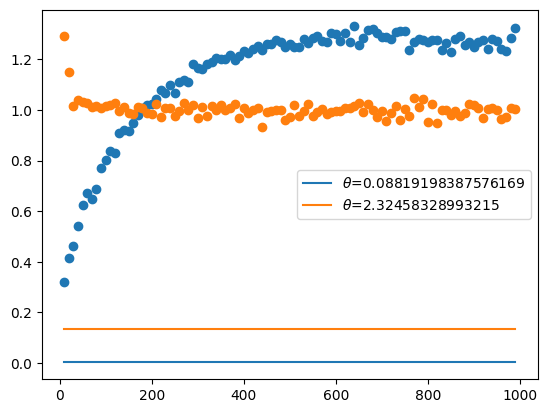

In [132]:
def theta_mle(dt_pt,N):
    return 2*np.arcsin(np.sqrt(dt_pt/N))

def CRB(theta,N):
    return ((np.sin(theta/2)*np.cos(theta/2))**2)

theta_arr = np.random.uniform(0,2*np.pi, 5)


for i in range(2):
    theta = theta_arr[i]
    
    print(r"$\theta$="+str(theta))
    
    p = (np.sin(theta/2))**2
    
    print("p="+str(p))
    
    rng = np.random.default_rng()
    
    plt.plot(np.arange(10, 1000, 10), [CRB(theta,n) for n in range(10, 1000, 10)], label=r"$\theta$="+str(theta))
    

    N_arr = []
    del_theta_arr = []
    
    for N in range(10, 1000, 10):
    
        data = rng.binomial(N,p,1000)
        
        theta_hat = np.array([theta_mle(pt,N) for pt in data])
        
        del_theta_arr.append(np.std(theta_hat)*np.sqrt(N))
        N_arr.append(N)
    
    plt.scatter(N_arr, del_theta_arr)
    
    plt.legend()


## Bayesian parameter estimation 

### $x_i$ $N$ i.i.d rnd variables with $\mathcal{N}(\theta, sigma)$. 

### $\theta$ is rnd itself with $\mathcal{N}(\mu_\theta, sigma)$

